In [149]:
# Okay, let's have a look at what the oscillator networks are doing
import torch
import parameters_will
import torch.optim as optim
import RNN_Will as _model_
import numpy as np
import matplotlib.pyplot as plt
import pickle
import utils
import copy

%load_ext autoreload
%autoreload 2

# Set up our parameters
params = parameters_will.default_params()
path_here = %pwd
folder = "23_08_30_150908"
name = '43000'
path_name = path_here + "/" + folder + "/" + name
model = torch.load(path_name)

device = 'cpu'
print(model.par.h_size)
params.model.h_size = model.par.h_size

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
20


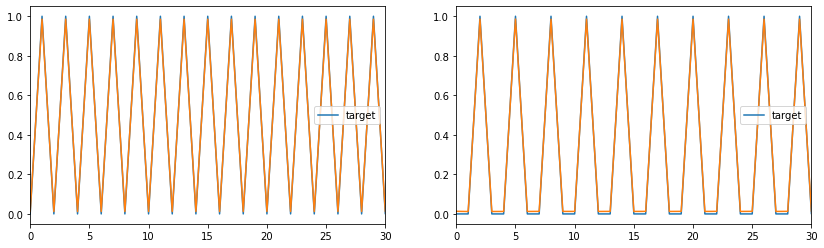

In [150]:
# Let's extract all the weights, biases, and the activities on a big set of frequencies
T = 300
xlimit = 30
params.data.min_length = T
params.data.max_length = T+1
input_dict = utils.generate_osc_data(params)

# Weights and biases
hidden_init = model.hidden_init.detach().numpy()
out_weights = model.predict.state_dict()['weight'][0,:].detach().numpy()
out_bias = model.predict.state_dict()['bias'].detach().numpy()
hidden_weights = model.transition.state_dict()['weight'].detach().numpy()
hidden_biases = model.transition.state_dict()['bias'].detach().numpy()

variables = model(input_dict, device=device)
output = torch.stack(variables.pred).detach().numpy()[:,:,0]
hidden = torch.stack(variables.hidden).detach().numpy()
pres = torch.stack(variables.pres).detach().numpy()

plt.figure(figsize=(14,2*params.model.batch_size))
for sample in range(params.model.batch_size):
    plt.subplot(1,params.model.batch_size,1+sample)
    #plt.title(f'Desired Function, freq = {params.data.freqs[sample]}')
    plt.plot(input_dict.outputs[:,sample],label='target')
    plt.plot(output[:,sample])
    plt.legend()
    plt.xlim([0, xlimit])

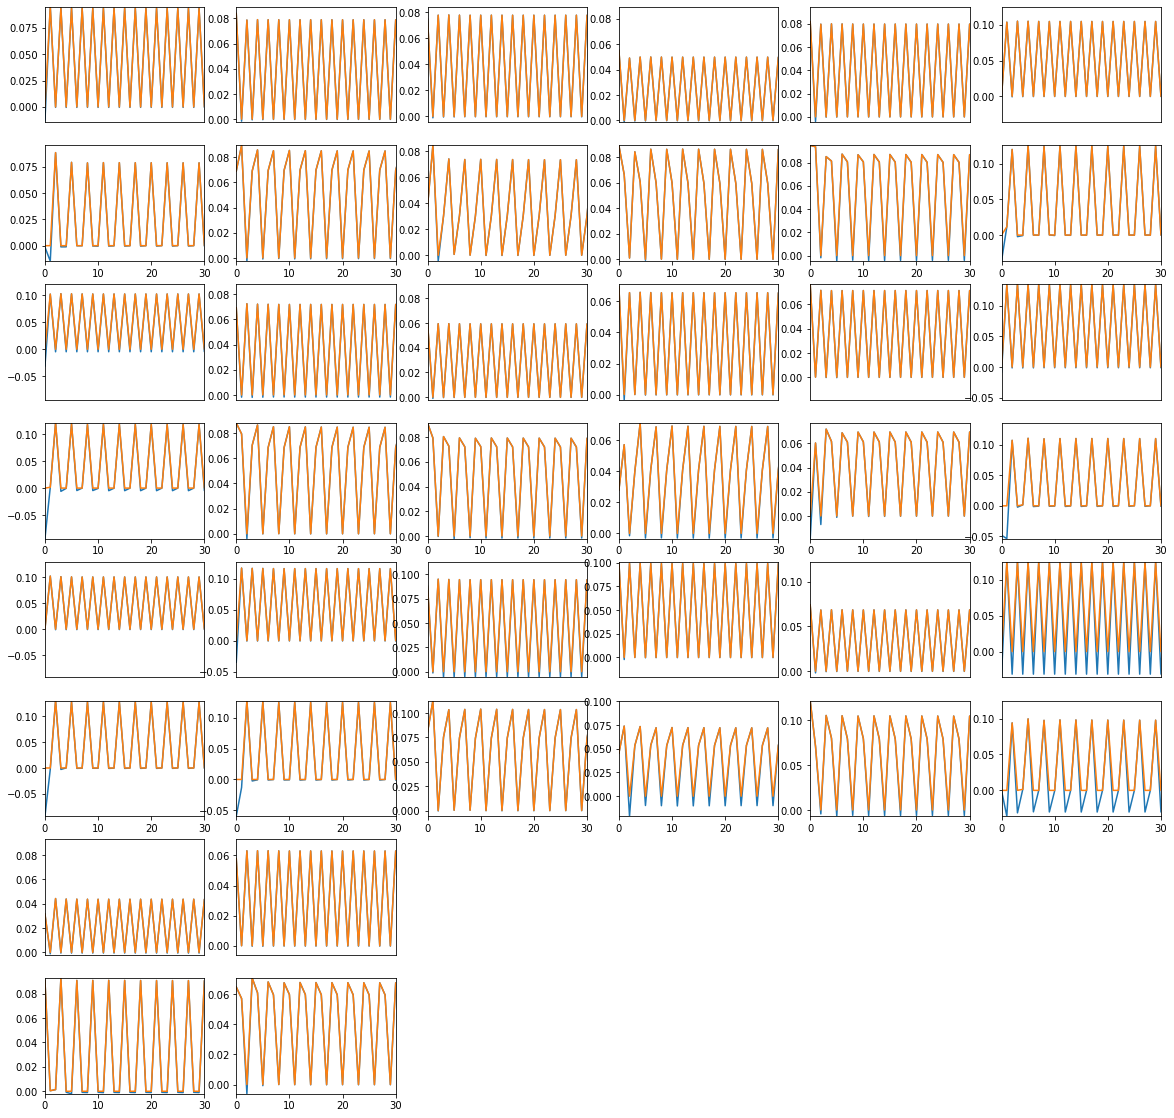

In [151]:
plt.figure(figsize = (20,20))
columns = 6
rows = int(np.ceil(2*params.model.h_size/columns))+1
counter = -1
for neuron in range(params.model.h_size):
    ylimit_max = np.amax(hidden[:,:,neuron])
    ylimit_min = np.amin(pres[:,:,neuron])
    
    pres_here = pres[:,:,neuron]
    #pres_here[pres_here > 0] = 0
    
    if neuron%columns == 0:
        counter += 1
    plt.subplot(rows, columns, neuron+1+counter*columns)
    plt.plot(pres_here[:,0])
    plt.plot(hidden[:,0,neuron])

    plt.xlim([0, xlimit])
    plt.ylim([ylimit_min, ylimit_max])
    plt.xticks([])

    plt.subplot(rows, columns, neuron+1+(counter+1)*columns)
    plt.plot(pres_here[:,1])
    plt.plot(hidden[:,1,neuron])
    plt.xlim([0, xlimit])
    plt.ylim([ylimit_min, ylimit_max])